# Neural Networks
Regina Ceballos

147663

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

# i. Logistic Regression

In [2]:
x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.zeros([2, 1]))
b = tf.Variable(tf.zeros([1]))

In [3]:
yhat = tf.nn.sigmoid(tf.matmul(x, W) + b)
ecm = tf.reduce_mean(tf.reduce_sum(tf.square(y - yhat)))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(ecm)

## AND Function

In [4]:
X_AND = np.asarray([[0,0], [0,1], [1,0], [1,1]])
Y_AND = np.asarray([[0], [0], [0], [1]])

Training with AND data

In [5]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
for i in range(5000):
    sess.run(train_step, feed_dict={x: X_AND, y: Y_AND})

In [6]:
print(sess.run(yhat, feed_dict={x:[[0.2,0.1]]}))
print(sess.run(W, feed_dict={x: X_AND, y: Y_AND}))

[[ 0.03704256]]
[[ 2.61000848]
 [ 2.61000848]]


In [7]:
correct_prediction = tf.equal(tf.argmax(yhat, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: X_AND, y: Y_AND}))

1.0


Decision boundary

In [8]:
w = [sess.run(b, feed_dict={x: X_AND, y: Y_AND})[0]] +[i[0] for i in sess.run(W, feed_dict={x: X_AND, y: Y_AND})]

In [9]:
m = ((w[0]/w[2]))/((-w[0]/w[1]))
b = -w[0]/w[2]
x0 = -0.5
y0 = m*x0 +b
x1 = 1.5
y1 = m*x1 +b

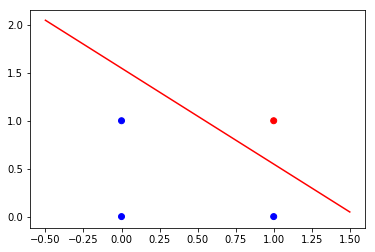

In [10]:
plt.scatter(X_AND[:,0], X_AND[:,1], c=['red' if i==1 else 'blue' for i in Y_AND])
plt.plot([x0, x1], [y0, y1], color='red')
plt.show()

## XOR Function

In [11]:
X_XOR = np.asarray([[0,0], [0,1], [1,0], [1,1]])
Y_XOR = np.asarray([[0], [1], [1], [0]])

Training with XOR data

In [12]:
sess.run(tf.global_variables_initializer())
for i in range(10000):
    sess.run(train_step, feed_dict={x: X_XOR, y: Y_XOR})     

In [13]:
print(sess.run(yhat, feed_dict={x:[[0.2,0.1]]}))
print(sess.run(W, feed_dict={x: X_XOR, y: Y_XOR}))

[[ 0.5]]
[[ 0.]
 [ 0.]]


In [14]:
correct_prediction = tf.equal(tf.argmax(yhat, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: X_XOR, y: Y_XOR}))

1.0


Decision boundary

In [18]:
w = [1.5482494] + [i[0] for i in sess.run(W, feed_dict={x: X_XOR, y: Y_XOR})]

In [19]:
m = ((w[0]/w[2]))/((-w[0]/w[1]))
b = -w[0]/w[2]
x0 = -0.5
y0 = m*x0 +b
x1 = 1.5
y1 = m*x1 +b

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in divide
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in divide
  


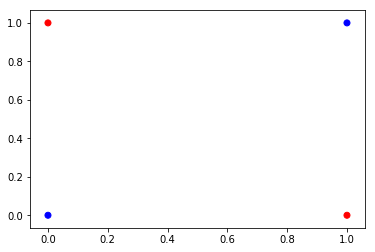

In [20]:
plt.scatter(X_XOR[:,0],X_XOR[:,1],c=['red' if i==1 else 'blue' for i in Y_XOR])
plt.plot([x0, x1],[y0, y1],color='red')
plt.show()

# ii. ANN for XOR Function

In [21]:
x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1])
W1 = tf.Variable(tf.random_uniform([2, 2], -1, 1))
b1 = tf.Variable(tf.zeros([2]))
W2 = tf.Variable(tf.random_uniform([2, 1], -1, 1))
b2 = tf.Variable(tf.zeros([1]))

In [22]:
h = tf.nn.sigmoid(tf.matmul(x, W1) + b1)
yhat = tf.nn.sigmoid(tf.matmul(h, W2) + b2)
ecm = tf.reduce_mean(tf.reduce_sum(tf.square(y - yhat)))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(ecm)

In [23]:
X = np.asarray([[0,0], [0,1], [1,0], [1,1]])
Y = np.asarray([[0], [1], [1], [0]])

In [24]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
for k in range(100000):
    sess.run(train_step, feed_dict={x: X, y: Y})

In [25]:
correct_prediction = tf.equal(tf.round(yhat), y)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: X, y: Y}))

1.0


In [26]:
yhat_ = [sess.run(yhat, feed_dict={x: X, y: Y})][0]
W1_ = [sess.run(W1)][0]
b1_ = [sess.run(b1)][0]
W2_ = [sess.run(W2)][0]
b2_ = [sess.run(b2)][0]
err_ = [sess.run(ecm, feed_dict={x: X, y: Y})][0]
print 'yhat ', yhat_
print 'W1 ', W1_
print 'b1 ', b1_
print 'W2 ', W2_
print 'b2 ', b2_
print 'Error ', err_

yhat  [[ 0.03959751]
 [ 0.95581651]
 [ 0.95587063]
 [ 0.03557187]]
W1  [[-6.07933474  6.21867132]
 [ 6.26939154 -6.01304102]]
b1  [ 3.09018826  3.05077887]
W2  [[-7.25490522]
 [-7.26309443]]
b2  [ 10.68555069]
Error  0.0067329


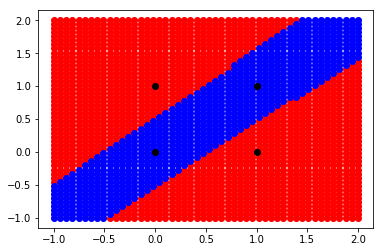

In [27]:
xs = np.linspace(-1, 2)
ys = np.linspace(-1, 2)
pred_classes = []
for i in xs:
    for j in ys:
        pred_class = sess.run(yhat, feed_dict={x: [[i, j]]})
        pred_classes.append((i, j, np.around(pred_class)))
xs_p, ys_p = [], []
xs_n, ys_n = [], []
for i, j, c in pred_classes:
    if c == 0.:
        xs_n.append(i)
        ys_n.append(j)
    else:
        xs_p.append(i)
        ys_p.append(j)
plt.plot(xs_p, ys_p, 'ro', xs_n, ys_n, 'bo', X[:,0], X[:,1], 'ko')
plt.show()

# ii. ANN for points inside a circle

In [28]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1])
W1 = tf.Variable(tf.random_uniform([2, 3], -1, 1))
b1 = tf.Variable(tf.zeros([1, 3]))
W2 = tf.Variable(tf.random_uniform([3, 1], -1, 1))
b2 = tf.Variable(tf.zeros([1, 1]))

In [29]:
h = tf.nn.sigmoid(tf.matmul(x, W1) + b1)
yhat = tf.nn.sigmoid(tf.matmul(h, W2) + b2)
ecm = tf.reduce_mean(tf.reduce_sum(tf.square(y - yhat)))
train_step = tf.train.GradientDescentOptimizer(0.03).minimize(ecm)

In [30]:
n = 1000
X1 = np.resize(np.random.uniform(-2, 2, n), (n,1))
X2 = np.resize(np.random.uniform(-2, 2, n), (n,1))

In [31]:
def circ(X1, X2):
    if X1*X1 + X2*X2 < 1:
        return 1
    else:
        return 0

In [32]:
X = np.concatenate((X1, X2), axis = 1)
Y = np.resize([circ(X1[i], X2[i]) for i in range(len(X1))], (n,1))

In [33]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
for k in range(10000):
    sess.run(train_step, feed_dict={x: X, y: Y})

In [34]:
correct_prediction = tf.equal(tf.round(yhat), y)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: X, y: Y}))

0.981


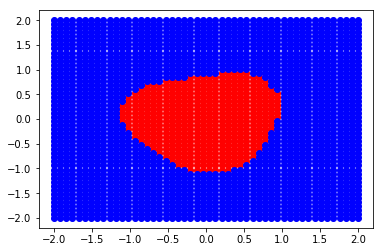

In [35]:
xs = np.linspace(-2, 2)
ys = np.linspace(-2, 2)
pred_classes = []
for i in xs:
    for j in ys:
        pred_class = sess.run(yhat, feed_dict={x: [[i, j]]})
        pred_classes.append((i, j, np.around(pred_class)))
xs_p, ys_p = [], []
xs_n, ys_n = [], []
for i, j, c in pred_classes:
    if c == 0.:
        xs_n.append(i)
        ys_n.append(j)
    else:
        xs_p.append(i)
        ys_p.append(j)
plt.plot(xs_p, ys_p, 'ro', xs_n, ys_n, 'bo')
plt.show()